In [20]:
# data analysis and wrangling
import pandas as pd
import numpy as np
# visualization

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import graphviz
import sklearn.tree as tree

import warnings
warnings.filterwarnings('ignore')


# Titanic Database Overview

**First see the link:**
- <h> https://www.kaggle.com/c/titanic/data </h>


### Question and problem definition

Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

We may also want to develop some early understanding about the domain of our problem. This is described on the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note.

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- **Hypothesis**: Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


# I. Acquire data

We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [10]:
train_df = pd.read_csv('../../dataset/titanic/train.csv')
test_df = pd.read_csv('../../dataset/titanic/test.csv')

In [11]:
# print column names
print(f"Data features: \n Shape {train_df.shape}\n Columns {train_df.columns.values}") 

Data features: 
 Shape (891, 12)
 Columns ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [12]:
# See if there is missing data and the type of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# II. Exploratory Data Analysis

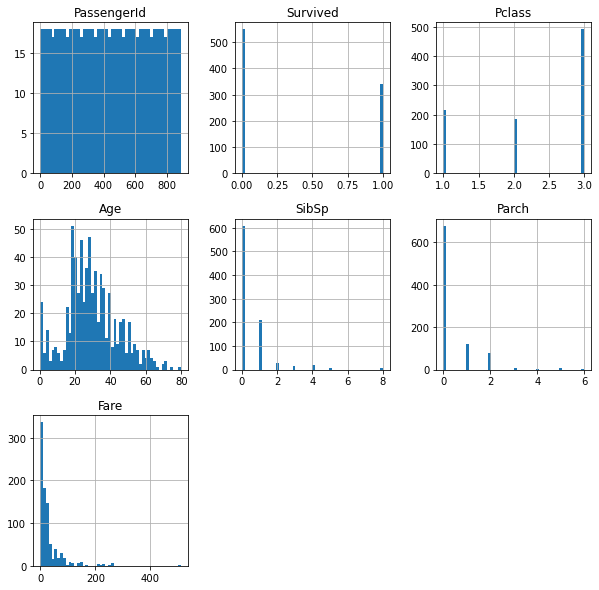

In [13]:
#visualize the histogram
_ = train_df.hist(bins=50,figsize=(10,10))

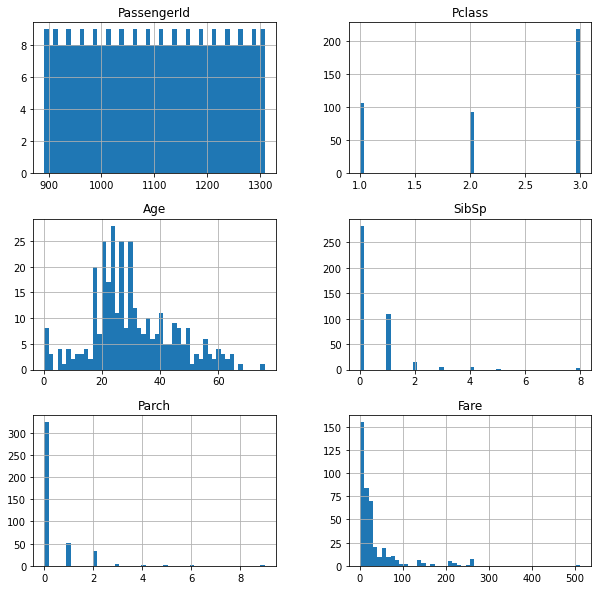

In [14]:
#visualize the histogram for the test
_ = test_df.hist(bins=50,figsize=(10,10))

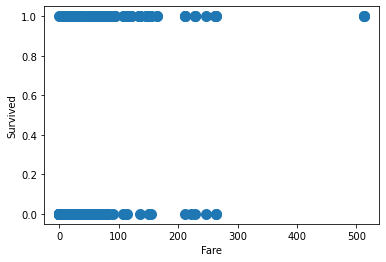

In [15]:
#visualize the corelation matrix 
train_df.corr().style.background_gradient(cmap='Reds')

#scatter plt of pandas
_ = train_df.plot.scatter(x='Fare',y='Survived',s=100)

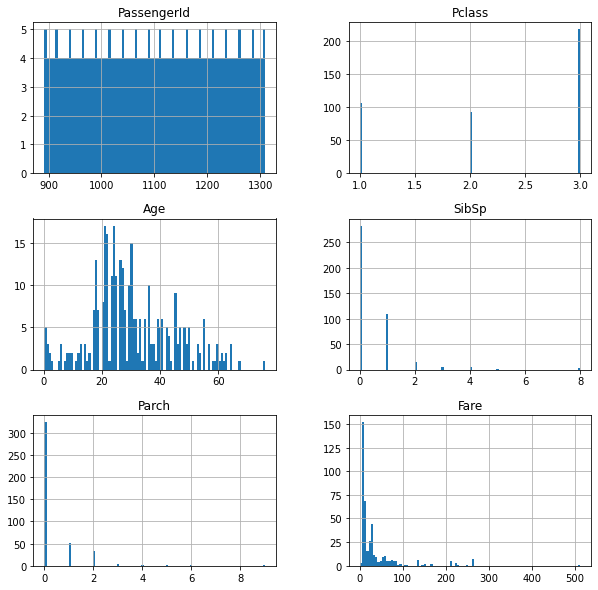

In [16]:
_ = test_df.hist(bins=100,figsize=(10,10))

# III. Let's build our first model

## One attribute model

In [21]:
X = train_df[['Fare']].copy()
y = train_df['Survived'].copy() # or df.Survived.values
y.count() #so we need no preprocessing

891

In [22]:
#First Step
model1 = DecisionTreeClassifier()

#Second step
model1.fit(X,y)

#Prediction
y_pred = model1.predict(X)

#Compute the accuracy of our model
print(round(np.sum(y==y_pred)/len(y)*100,2),"%")

80.36 %


In [23]:
dot_data  = tree.export_graphviz(model1, out_file=None,  
                class_names=['0','1'], # the target names.
                feature_names=['Fare'], # the feature names.
                filled=True, # Whether to fill in the boxes with colours.
                rounded=True, # Whether to round the corners of the boxes.
                special_characters=True)



graph = graphviz.Source(dot_data, format="png") 

graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

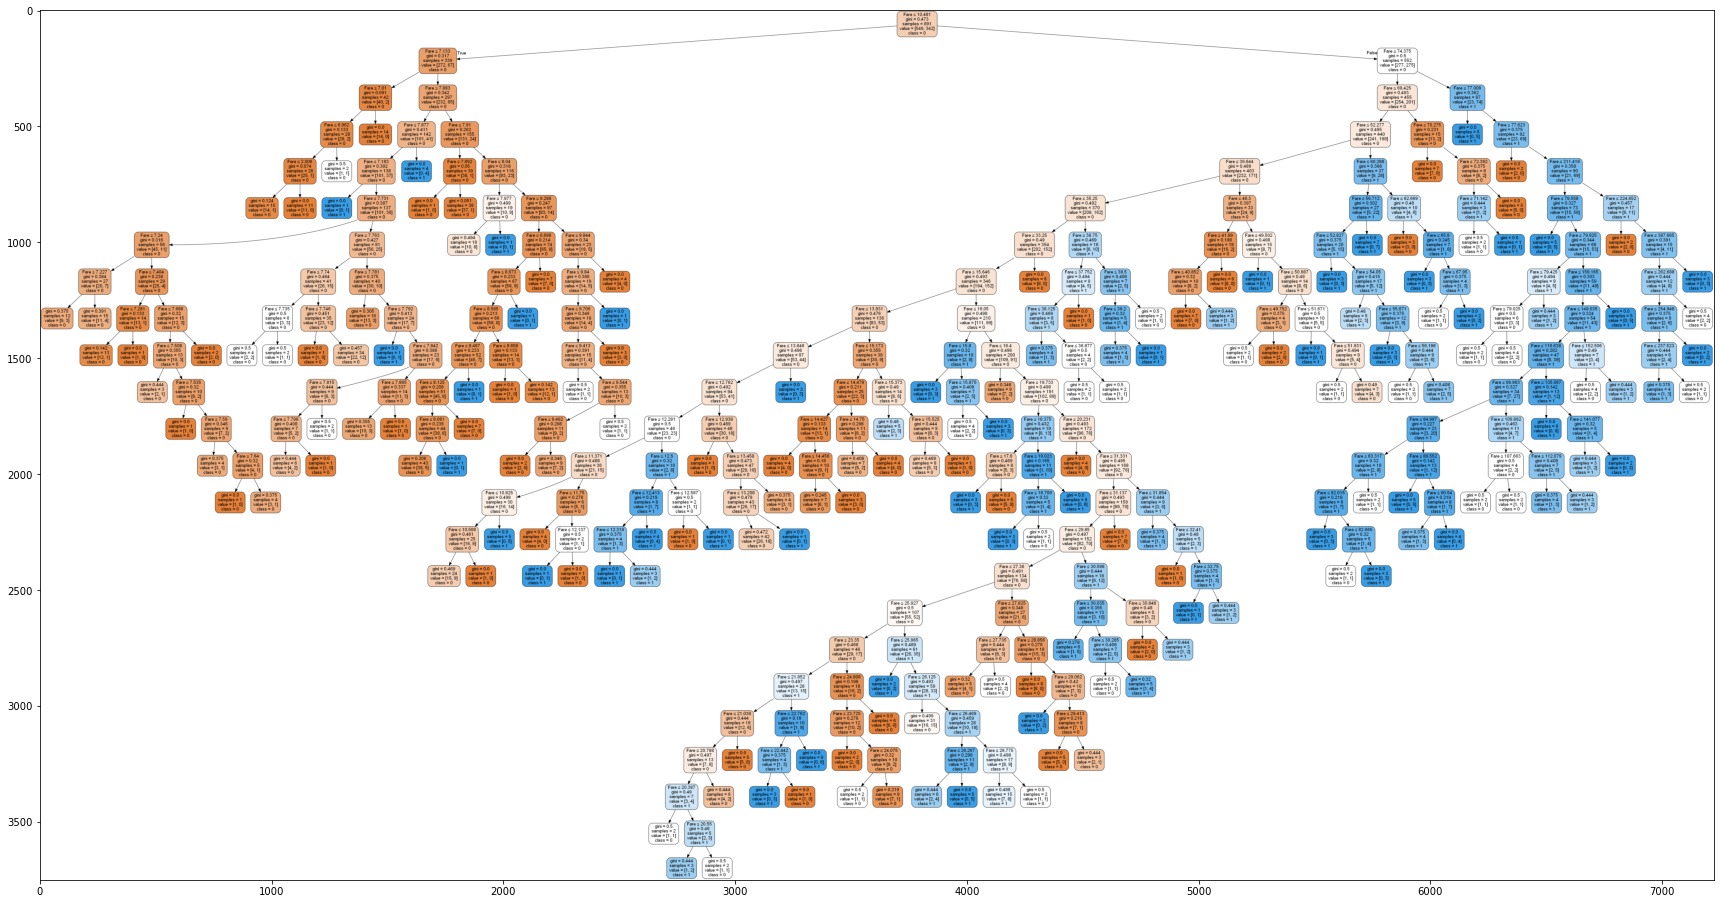

In [44]:
plt.figure(figsize=(30,30))
img = mpimg.imread('decision_tree_graphivz.png')
imgplot = plt.imshow(img)
plt.show()

In [48]:
confusion_matrix(y, y_pred, labels=[1, 0])

array([[199, 143],
       [ 32, 517]], dtype=int64)

In [145]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(517, 32, 143, 199)

In [146]:
# print the accuracy score 
print(round(accuracy_score(y,p)*100,2),"%")

80.36 %


In [46]:
# global report of metric 
target_names = ['Survives', 'Death']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Survives       0.78      0.94      0.86       549
       Death       0.86      0.58      0.69       342

    accuracy                           0.80       891
   macro avg       0.82      0.76      0.77       891
weighted avg       0.81      0.80      0.79       891



<AxesSubplot:>

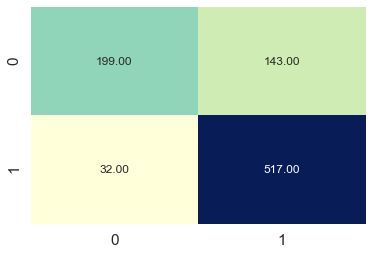

In [61]:
sn.set(font_scale=1.4) #
sn.heatmap(confusion_matrix(y, y_pred, labels=[1, 0]), annot=True, annot_kws={"size": 12},fmt='.2f', cmap="YlGnBu", cbar=False)

The previous example is not realistic as there is no outcome (only train is used)

In [62]:
train_set = train_df[0:700].copy()
test_set = train_df[700:].copy()

print(train_set.shape,test_set.shape)

X_train = train_set[['Fare']]
y_train = train_set['Survived']

X_test = test_set[['Fare']]
y_test = test_set['Survived'] 

#First Step
dt_model = DecisionTreeClassifier()

#Second step
dt_model.fit(X_train,y_train)

#Prediction
pred_train = dt_model.predict(X_train)

pred_test = dt_model.predict(X_test)

#Prediction on the train
1 - np.sum(pred_train==y_train)/len(y_train)

#Prediction on the test
1 - np.sum(pred_test==y_test)/len(y_test)

print('Train Score (error) :',1-accuracy_score(y_train,pred_train),"or: ", 1-dt_model.score(X_train,y_train))
print('Test Score (error) :',1-accuracy_score(y_test,pred_test),"or: ", 1-dt_model.score(X_test,y_test))

#Visualization with graph : Step for installation
#1) https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#2) conda install -c anaconda graphviz     or  conda install -c conda-forge python-graphviz 


# Different way to plot a tree

# https://mljar.com/blog/visualize-decision-tree/

#_ = tree.plot_tree(dt_model, 
#                class_names=['0','1'], # the target names.
#                feature_names=['Fare'], # the feature names.
#                filled=True, # Whether to fill in the boxes with colours.
#                rounded=True # Whether to round the corners of the boxes.
#               )

dot_data  = tree.export_graphviz(dt_model, out_file=None,  
                class_names=['0','1'], # the target names.
                feature_names=['Fare'], # the feature names.
                filled=True, # Whether to fill in the boxes with colours.
                rounded=True, # Whether to round the corners of the boxes.
                special_characters=True)



graph = graphviz.Source(dot_data, format="png") 

(700, 12) (191, 12)
Train Score (error) : 0.19428571428571428 or:  0.19428571428571428
Test Score (error) : 0.2722513089005235 or:  0.2722513089005235


So, our model is very bad!!!